In [3]:
pip install wordcloud

     |████████████████████████████████| 160 kB 638 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity # metric yang digunakan untuk mengukur seberapa mirip dokumen terlepas dari ukurannya
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # Membutuihkan isntall package wordcloud
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv("dataset/Myntra Kurtis/Myntra kurtis.csv")
print(data.head())

       Brand Name                                        Product URL  \
0  Rain & Rainbow  https://www.myntra.com/kurtis/rain--rainbow/ra...   
1        HERE&NOW  https://www.myntra.com/kurtis/herenow/herenow-...   
2           Anouk  https://www.myntra.com/kurtis/anouk/anouk-wome...   
3       Anubhutee  https://www.myntra.com/kurtis/anubhutee/anubhu...   
4           GERUA  https://www.myntra.com/kurtis/gerua/gerua-wome...   

                                               Image  Product Ratings  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.3   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...              4.2   

   Number of ratings                               Product Info  \
0                 28                  Printed Pure Cotton Kur

In [3]:
# Setting ukuran grafik yang akan di tampilkan
import matplotlib.pyplot as plt  # Untuk menampikan grafik 
plt.rcParams["figure.figsize"] = (20,6)  

In [4]:
# Lihat isi tabel dataset terlait jenis type data
data.dtypes

Brand Name            object
Product URL           object
Image                 object
Product Ratings      float64
Number of ratings      int64
Product Info          object
Selling Price        float64
Price                float64
Discount              object
dtype: object

### Data berisi informasi terkait :
    + Brand name of product
    + URL of the product
    + Image URL of product
    + Ratings of the product on Myntra
    + Total Number of ratings
    + Information about the product
    + Selling Price and original price of the product
    + Discount product
    

In [8]:
# Menampilkan dimensi dataset
data.shape

(599, 9)

### Prepare analyze dataset

In [5]:
# Find null value on dataset
print(data.isnull().sum())

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


+ Terdapat 467 null value pada 'Image' dataset padahal total row ada 599 , karena ini menggagu analisa maka kita drop colum Image tsb.

In [9]:
data = data.drop("Image", axis=1)

In [10]:
# Drop Null value di beberapa column yg lain
data = data.dropna()

In [11]:
print(data.shape)

(364, 8)


+ Data tinggal 364 rows dan kolom tinggal 8

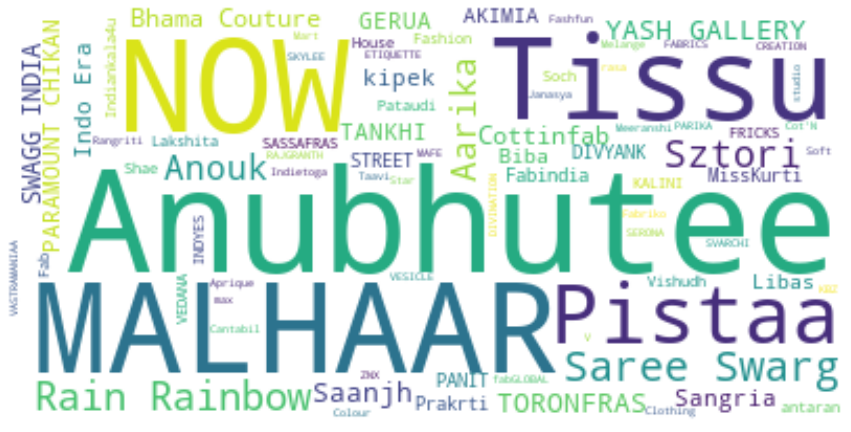

In [12]:
# Kita lanjutkan dengan melihat merek-merek yang lebih banyak menjual Kurtis di Myntra
text = " ".join(i for i in data["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

+ Merek seperti Anubhutee, Malhaar, Now, Tissu, dan Pistaa populer untuk Kurtis di toko ecommerce 'Myntra'

In [14]:
# Mari kita lihat Kurtis dengan rating tertinggi di Myntra
highest_rated = data.sort_values(by=["Product Ratings"], ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated[['Product Info', 'Product Ratings', 'Brand Name']])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


+ Tampak Merk 'INDYES', Sangria, Malhaar dansebagainya itu memiliki ratting penjualan yg tinggi masuk top ten penjualan. 

# Rekomendasikan Product Fashion 

+ Untuk merekomendasikan mode yang sedang tren, kami tidak dapat menggunakan strategi pemfilteran berbasis konten. Strategi pemfilteran berbasis konten bagus untuk digunakan saat pengguna melihat produk fesyen, dan aplikasi Anda ingin merekomendasikan hal serupa.

+ Untuk merekomendasikan fashion yang sedang tren, kita dapat menemukan rata-rata tertimbang dari semua peringkat dan merekomendasikan produk berdasarkan peringkat rata-rata tertimbang. Untuk menghitung skor tertimbang dari semua peringkat Kurtis, kita membutuhkan:
    + mean rating (mr): the mean rating of all the products
    + minimum ratings (m): minimum number of ratings
    + number of ratings (n): total number of ratings of the product
    + average ratings (a): average rating of the product


+ Kita hitung dengan menggunakan rumus scorring seperti ini:
    + score = (n/(n+m) * a) + (m/(m+n) * mr)


In [15]:
# Pendefinisian formula:

mr = data['Product Ratings'].mean()
m  = data['Number of ratings'].quantile(0.9)
n  = data['Number of ratings']
a  = data['Product Ratings']
data["Score"] = (n/(n+m)*a) + (m/(m+n)*mr)

In [16]:
recommendations = data.sort_values('Score', ascending=False)
print(recommendations[['Brand Name', 'Product Info', 'Product Ratings', 'Score', 'Selling Price', 'Discount']].head(10))

         Brand Name                                       Product Info  \
48            Tissu                    Women Floral Print A-Line Kurti   
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     Score  Selling Price   Discount  
48               4.4  4.338320          549.0  (45% OFF)  
11               4.4  4.300868          521.0  (70% OFF)  
155     